In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

<font size = "6">
<b>Statistics</b>
</font>

Table of Contents
<div id="toc"></div>

<img src="./image_files/data_model.png", width = 300>

# 1. Populations and Samples
- A **population** includes all the elements from a set of data

- A **parameter** is a quantity computed from a population
    - mean, $\mu$
    - variance, $\sigma^2$


- A **sample** is a subset of the population.
    - one or more observations

- A **statistic** is a quantity computed from a sample
    - sample mean, $\bar{x}$
    - sample variance, $𝑠^2$
    - sample correlation, $𝑆_{𝑥𝑦}$

# 2. Inference
- True population or process is modeled probabilistically.
- Sampling supplies us with realizations from probability model.
- Compute something, but recognize that we could have just as easily gotten a different set of realizations.

<br>
<img src = "./image_files/inference.png" style="border:1px solid black", width = 600>
<br>

<br>
<img src = "./image_files/inference_multiples.png" style="border:1px solid black", width = 600>
<br>

- We want to infer the characteristics of the true probability model from our **one** sample.

<br>
<img src = "./image_files/inference_one.png" style="border:1px solid black", width = 600>
<br>

# 3. Law of Large Numbers
- Sample mean converges to the population mean as sample size gets large

$$ \bar{x} \rightarrow \mu_x \qquad \text{as} \qquad m \rightarrow \infty$$

- True for any probability density functions

<br>
<img src = "./image_files/law_of_large_numbers.png" style="border:1px solid black", width = 600>
<br>

- [wikipedia](http://en.wikipedia.org/wiki/Law_of_large_numbers)

## 3.1. Sample Mean and Sample Size

- sample mean and sample variance

$$
\begin{align}
\bar{x} &=\frac{x_1+x_2+...+x_m}{m}\\
s^2 &=\frac{\sum_{i=1}^{m}(x_i-\bar{x})^2}{m-1}
\end{align}
$$

- suppose $x \sim U[0,1]$

In [2]:
# statistics
# numerically understand statisticcs

m = 100
x = np.random.rand(1, m)

xbar = 1/m*np.sum(x)
np.mean(x)

varbar = (1/(m - 1))*np.sum((x - xbar)**2)
np.var(x)

print (xbar)
print (np.mean(x))
print (varbar)
print (np.var(x))

0.499714654663
0.499714654663
0.0780943715329
0.0773134278176


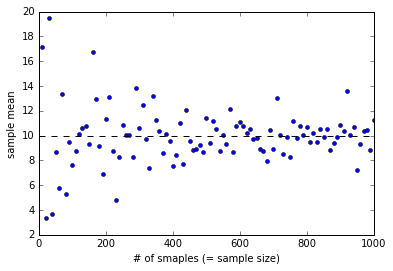

In [3]:
# various sample size m

m = np.array([[x for x in range(10,1001,10)]])
means = np.zeros((1, np.shape(m)[1])) # np.shape(m)[1] is length of m
#m shape is (1, 1000)
for i in range(0, np.shape(m)[1]):
    x = np.random.normal(10, 30, m[0, i])
    means[0, i] = np.mean(x)
    
plt.plot(m, means, 'bo', markersize = 4)
plt.plot([0, np.max(m)], [10, 10], 'k--')
plt.xlabel('# of smaples (= sample size)', fontsize = 10)
plt.ylabel('sample mean', fontsize = 10)

# 4. Central limit theorem

- <font color='red'>Sample mean</font> (not samples) will be approixmatedly normally distributed as a sample size $m \rightarrow \infty$

$$ \bar{x} =\frac{x_1+x_2+...+x_m}{m}$$


- More samples provide more confidence (or less uncertainty)
- Note: true regardless of any distribution of population

$$ \bar{x} \rightarrow N\left(\mu_x,\left(\frac{\sigma}{\sqrt{m}}\right)^2 \right) $$

<br>
<img src = "./image_files/central_limit_theorem_2.png" style="border:1px solid black", width = 600>
<br>

- [wikipedia](http://en.wikipedia.org/wiki/Central_limit_theorem)

## 4.1. Variance Gets Smaller as $m$ is Larger
- Seems approximately Gaussian distributed 
- numerically demostrate that sample mean follows the Gaussin distribution

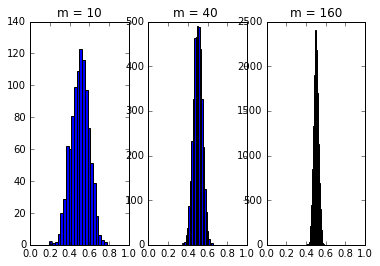

In [4]:
## plot - s 800, 420
N = 100

m = np.array([10, 40, 160])

S1 = np.array([])
S2 = np.array([])
S3 = np.array([])


for i in range(0, N):
    S1 = np.concatenate((S1, np.mean(np.random.rand(m[0], m[0]), axis = 0)))
    S2 = np.concatenate((S2, np.mean(np.random.rand(m[1], m[1]), axis = 0)))
    S3 = np.concatenate((S3, np.mean(np.random.rand(m[2], m[2]), axis = 0)))

plt.subplot(1, 3, 1)
plt.hist(S1, 21)
plt.xlim([0, 1])
plt.title('m = 10')

plt.subplot(1, 3, 2)
plt.hist(S2, 21)
plt.xlim([0, 1])
plt.title('m = 40 ')

plt.subplot(1, 3, 3)
plt.hist(S3, 21)
plt.xlim([0, 1])
plt.title('m = 160')
plt.show()

# 5. How to Generate Random Numbers (Samples or data)
- Data sampled from population/process/generative model

In [16]:
## random number generation (1D)
m = 1000;

# uniform distribution U(0,1)
x1 =np.random.rand(1,m);

# uniform distribution U(a,b)
a = 1;  
b = 5;
x2 = a + (b-a)*np.random.rand(1,m);

# standard normal (Gaussian) distribution N(0,1^2)
x3 = np.random.randn(1,m);

# normal distribution N(5,2^2)
x4 = 5 + 2*np.random.randn(1,m);

# random integers
x5 = np.random.randint(1, 6, size = (1,m ));

## Histogram : graphical representation of data distribution

$ \Rightarrow$ rough sense of density of data

<br>
<img src="./image_files/histogram2.png" width = 300>
<br>

# 5. Multivariate Statistics


$$
x^{(i)} = \begin{bmatrix}x_1^{(i)} \\ x_2^{(i)}\\ \vdots \end{bmatrix}, \quad X = \begin{bmatrix} -& (x^{(i)})^T & -\\ - & (x^{(i)})^T & -\\ & \vdots & \\ - & (x^{(m)})^T & -\end{bmatrix}$$

- $m$ observations $\left(x^{(i)}, x^{(2)}, \cdots , x^{(m)}\right)$

$$ 
\begin{align*}
\text{sample mean} \; \bar x &= \frac{x^{(1)} + x^{(2)} + \cdots + x^{(m)}}{m} = \frac{1}{m} \sum\limits_{i=1}^{m}x^{(i)} \\
\text{sample variance} \; S^2 &= \frac{1}{m-1} \sum\limits_{i=1}^{m}(x^{(i)} - \bar x)^2 \\
(\text{Note: } &\text{population variance} \; \sigma^2 = \frac{1}{N}\sum\limits_{i=1}^{N}(x^{(i)} - \mu)^2
\end{align*}
$$


## 5.1. Two random variables


$$
\begin{align*} \text{Sample Variance} : S_x &= \frac{1}{m-1} \sum\limits_{i=1}^{m}\left(x^{(i)}-\bar x\right)^2 \\
 \text{Sample Covariance} : S_{xy} &= \frac{1}{m-1} \sum\limits_{i=1}^{m}\left(x^{(i)}-\bar x\right)\left(y^{(i)}-\bar y \right)\\
\text{Sample Covariance matrix} : S &= 
\begin{bmatrix} 
S_x & S_{xy}  \\
S_{yx} & S_y 
\end{bmatrix}\\
 \text{sample correlation coefficient} :
r &= \frac{S_{xy}}{ \sqrt {S_{xx}\cdot S_{yy}} }
\end{align*}$$

- strength of <font color='red'><b>linear</b></font> relationship between two variables, $x$ and $y$

$$x_1 \leq x_2 \leq \cdots \leq x_n$$

$$y_1 \leq y_2 \leq \cdots \leq y_n$$


<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            $$ \begin{align*} & \begin{bmatrix} x_1 \\ y_1 \end{bmatrix}, \begin{bmatrix} x_2 \\ y_2 \end{bmatrix}, \cdots, \begin{bmatrix} x_n \\ y_n \end{bmatrix} \\ \\ \\ \\
            & \begin{bmatrix} x_1 \\ y_n \end{bmatrix}, \begin{bmatrix} x_2 \\ y_{n-1} \end{bmatrix}, \cdots, \begin{bmatrix} x_n \\ y_1 \end{bmatrix} \\ \\ \\ \\
            & \begin{bmatrix} x_i \\ y_j \end{bmatrix} \text{ random selection} \end{align*}$$
        </td>
        <td width = 48%>
            <img src="./image_files/relationship2.png" width = 320>
        </td>
    </tr>
</table>

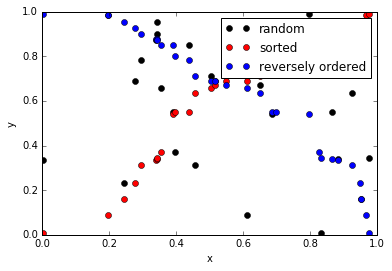

In [5]:
# correlation

m = 30
x = np.random.rand(1, m)
y = np.random.rand(1, m)

xo = np.sort(x)
yo = np.sort(y)
yor = np.array(yo[:,::-1])

plt.plot(x.squeeze(), y.squeeze(),'ko')
plt.plot(xo.squeeze(), yo.squeeze(),'ro')
plt.plot(xo.squeeze(), yor.squeeze(),'bo')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(['random','sorted','reversely ordered'], )

## 5.2. Correlation coefficient


- $+1 \to$ close to a straight line

- $-1 \to$ close to a straight line

- Indicate how close to a <font color='red'>linear</font> line, but

- No information on slope

$$0 \leq \left\lvert \text{ correlation coefficient } \right\rvert \leq 1$$

$$\hspace{1cm}\begin{array}{Icr}\leftarrow\\ (\text{uncorrelated})\end{array} 
\quad \quad \quad
\begin{array}{Icr}\rightarrow \\ (\text{linearly correlated})\end{array}$$


- does not tell anything about causality

## 5.3. Correlation Coefficient Plot

- Plots correlation coefficients among pairs of variables


## 5.4. Covariance Matrix

$$
\sum = \begin{bmatrix} 
E[(X_1-\mu_1)(X_1-\mu_1)]& E[(X_1-\mu_1)(X_2-\mu_2)] & \cdots &E[(X_1-\mu_1)(X_n-\mu_n)]\\
E[(X_2-\mu_2)(X_1-\mu_1)]& E[(X_2-\mu_2)(X_2-\mu_2)] & \cdots &E[(X_2-\mu_2)(X_n-\mu_n)]\\
\vdots & \vdots & \ddots & \vdots\\
E[(X_n-\mu_n)(X_1-\mu_1)]& E[(X_n-\mu_n)(X_2-\mu_2)] & \cdots &E[(X_n-\mu_n)(X_n-\mu_n)]\\
\end{bmatrix}$$


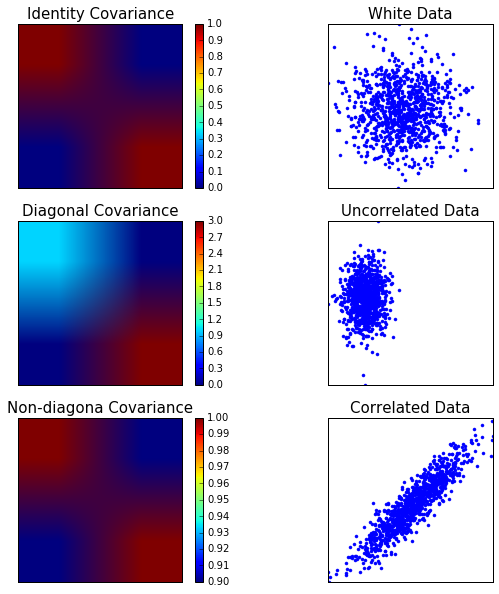

In [23]:
mu = np.array([0, 0])
sigma1 = np.array([[1, 0], [0, 1]])
sigma2 = np.array([[1, 0], [0, 3]])
sigma3 = np.array([[1, 0.9], [0.9, 1]])

m = 1000
r1 = np.random.multivariate_normal(mu, sigma1, m)
r2 = np.random.multivariate_normal(mu, sigma2, m)
r3 = np.random.multivariate_normal(mu, sigma3, m)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(3, 2, 1, xticks = [], yticks = [])
plt.imshow(sigma1)
plt.axis('image')
plt.colorbar()
plt.title('Identity Covariance',fontsize = 15)


ax = fig.add_subplot(3, 2, 3, xticks = [], yticks = [])
plt.imshow(sigma2)
plt.axis('image')
plt.colorbar()
plt.title('Diagonal Covariance',fontsize = 15)

ax = fig.add_subplot(3, 2, 5, xticks = [], yticks = [])
plt.imshow(sigma3)
plt.axis('image')
plt.colorbar()
plt.title('Non-diagona Covariance',fontsize = 15)

ax = fig.add_subplot(3, 2, 2, xticks = [], yticks = [])
plt.plot(r1[:, 0], r1[:, 1], '.')
plt.axis([-5, 5, -5, 5])
plt.axis('square')
plt.title('White Data',fontsize = 15)

ax = fig.add_subplot(3, 2, 4, xticks = [], yticks = [])
plt.plot(r2[:, 0], r2[:, 1], '.')
plt.axis([-5, 5, -5, 5])
plt.axis('square')
plt.title('Uncorrelated Data',fontsize = 15)

ax = fig.add_subplot(3, 2, 6, xticks = [], yticks = [])
plt.plot(r3[:, 0], r3[:, 1], '.')
plt.axis([-5, 5, -5, 5])
plt.axis('square')
plt.title('Correlated Data',fontsize = 15)

plt.show()

In [13]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>